<a href="https://colab.research.google.com/github/TanushreeNayak/ML-programs/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find-S algorithm

In [3]:

import numpy as np
import pandas as pd

csv_file_data = pd.read_csv('/DataS.csv')

data = np.array(csv_file_data)

def trainModel(trainingData):
  n = len(trainingData[0]) - 1
  specific_hypo = ["&"] * n
  general_hypo = ["?"] * n

  for instance in trainingData:
    if instance[-1] == 'yes':
      specific_hypo = instance[:-1]
      print('specific_hypo : ',specific_hypo)
      break

  for instance in trainingData:
    if instance[-1] == 'no':
      for i in range(n):
        if specific_hypo[i] != instance[i]:
          specific_hypo[i] = '?'
      print('Hypothesis : ',specific_hypo)

      if(specific_hypo == general_hypo):
        break

trainModel(data)


Candidate Elimination Algorithm

In [4]:
import numpy as np
import pandas as pd

csv_file_data = pd.read_csv("/DataS.csv")
# print(csv_file_data)

data = np.array(csv_file_data)
# print(data)

# Separate Features and Labels
X = data[:,:-1] # Features
Y = data[:,-1] # Labels
# print(x)
# print(y)

# Initialize Most General and Most Specific Hypothesis
num_features = X.shape[1]
# print(num_fearures)
S = ['Ø']*num_features # Most specific hypothesis
G = [['?']*num_features] # Most general hypothesis
# print(S)
# print(G)

# Candidate Elimination Algorithm
for i, x in enumerate(X):
    if Y[i] == 'Yes':  # Positive Example
        for j in range(num_features):
            if S[j] == 'Ø':  # Initialize S
                S[j] = x[j]
            elif S[j] != x[j]:  # Generalize S
                S[j] = '?'
        G = [g for g in G if all(g[j] == '?' or g[j] == x[j] for j in range(num_features))]

    else:  # Negative Example
        new_G = []
        for g in G:
            for j in range(num_features):
                if g[j] == '?':
                    g_new = g[:]
                    g_new[j] = S[j]  # Specialize G
                    new_G.append(g_new)
        G = new_G
        G = [g for g in G if not all(g[j] == '?' or g[j] == x[j] for j in range(num_features))]

# Output Final S and G
print("Final Specific Hypothesis (S):", S)
print("Final General Hypothesis (G):", G)

Final Specific Hypothesis (S): ['?', 'Sunny', '?', 'Yes', '?', '?']
Final General Hypothesis (G): [['?', 'Sunny', '?', '?', '?', '?'], ['?', '?', '?', 'Yes', '?', '?']]


Candidate Elimination Algorithm version 2

In [5]:
import csv

file = open('/DataS.csv')
all_rows = csv.reader(file)

attributes = [["Big", "Small"], ["Blue", "Red"], ["Circle", "Triangle"]]
# attributes = [["Sunny", "Rainy"], ["Warm", "Cold"], ["Normal", "High"], ["Strong", "Weak"], ["Warm", "Cold"], ["Same", "Change"]]

data = []
for row in all_rows:
    data.append(row)

specific_hypothesis = []
genral_hypothesis = []

for instance_index, instance in enumerate(data):
    print(genral_hypothesis, "gen")
    print(specific_hypothesis, "spe")

    if instance[-1]=="Yes":
        pop_index=[]
        new_genral_hypothesis=[]
        for hypothesis_index, hypothesis in enumerate(genral_hypothesis):
            for attribute_index, attribute in enumerate(hypothesis):

                if genral_hypothesis[hypothesis_index][attribute_index] != "?" and genral_hypothesis[hypothesis_index][attribute_index] != instance[attribute_index] and hypothesis_index not in pop_index:
                    pop_index.append(hypothesis_index)
                    # print(genral_hypothesis.pop(hypothesis_index), "pop")

        for hypo_indx in range(len(genral_hypothesis)):
            if hypo_indx not in pop_index:
                new_genral_hypothesis.append(genral_hypothesis[hypo_indx])

        genral_hypothesis = new_genral_hypothesis

        if specific_hypothesis:
            for attribute_index, attribute in enumerate(specific_hypothesis):
                if specific_hypothesis[attribute_index] != instance[attribute_index]:
                     specific_hypothesis[attribute_index] = '?'
        else:
            specific_hypothesis = instance[:-1]

    elif instance[-1]=="No":
        if genral_hypothesis:
            opp_instance = []
            for attribute_index, attribute in enumerate(instance):
                if attribute_index<len(data[0])-1:

                    if instance[attribute_index] == attributes[attribute_index][0]:
                        opp_instance.append(attributes[attribute_index][1])
                    else:
                        opp_instance.append(attributes[attribute_index][0])

            new_genhypo=[]
            for hypothesis_index, hypothesis in enumerate(genral_hypothesis):
                for attribute_index, attribute in enumerate(hypothesis):

                    if genral_hypothesis[hypothesis_index][attribute_index] != "?" and genral_hypothesis[hypothesis_index][attribute_index] != opp_instance[attribute_index]:
                        temp = genral_hypothesis.pop(hypothesis_index)
                        # pop_index.append(hypothesis_index)

                        for element_index, element in enumerate(opp_instance):
                            temp_hypo=["?"]*len(temp)
                            if element_index == attribute_index:
                                pass
                            else:
                                temp_hypo[attribute_index] = temp[attribute_index]
                                temp_hypo[element_index] = element
                                new_genhypo.append(temp_hypo)

            if new_genhypo:
                for hypo in new_genhypo:
                    if hypo not in genral_hypothesis:
                        genral_hypothesis.append(hypo)

        else:
            for attribute_index in range(len(data[0])-1):

                temp = ["?"]*(len(data[0])-1)

                if attribute_index < len(attributes):
                    if instance[attribute_index] == attributes[attribute_index][0]:
                        temp[attribute_index] = attributes[attribute_index][1]
                    else:
                        temp[attribute_index] = attributes[attribute_index][0]

                genral_hypothesis.append(temp)

    else:
        pass

print(specific_hypothesis)
print(genral_hypothesis)

[] gen
[] spe
[] gen
[] spe
[] gen
['Morning', 'Sunny', 'Warm', 'Yes', 'Mild', 'Strong'] spe
[['Big', '?', '?', '?', '?', '?'], ['?', 'Blue', '?', '?', '?', '?'], ['?', '?', 'Circle', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']] gen
['Morning', 'Sunny', 'Warm', 'Yes', 'Mild', 'Strong'] spe
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']] gen
['Morning', 'Sunny', '?', 'Yes', '?', '?'] spe
['?', 'Sunny', '?', 'Yes', '?', '?']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]


List Then Elimination Algorithm

In [6]:
import numpy as np
import pandas as pd
from itertools import product

csv_file_data=pd.read_csv('/DataS.csv')
#print(csv_file_data)

def create_sementical_distinct_hypothesis(data):
    # Extract the examples of the DataSet
    examples=np.array(data)[:,:-1]
    # print(examples)

    number_of_features=len(examples[0])
    #print(number_of_features)

    # Transpose the examples so that it is easy to make the set of the values of feature
    feature_transpose=np.transpose(examples)
    # print(feature_transpose)

    # Declare a 2D Array which store all the features set
    feature=[[]]*number_of_features
    # print(feature)

    # Iterations which make the sets of features value and also convert them into the 2D Array
    for i in range(len(feature_transpose)):
        my_set=set()
        for j in range(len(feature_transpose[0])):
            my_set.add(feature_transpose[i][j])
        # print(my_set)
        feature[i]=list(my_set)
    # print(feature)

    # Append the general condition in all the feature vectors
    for i in range(len(feature)):
        feature[i].append('?')
    # print(feature)

    # Create the Sementical Distinct Hypothesis
    sementical_distinct_hypothesis=list(product(*feature))
    # print(sementical_distinct_hypothesis)
    # print(len(sementical_distinct_hypothesis))

    # Return the Sementical Distinct Hypothesis
    return sementical_distinct_hypothesis

def compare_feature_Vector(arr1,arr2):
    # Check the corresponding feature value is acceptable or not
    # if acceptable return True otherwise return False
    length=len(arr1)
    for i in range(length):
        if arr1[i]==arr2[i]:
            pass
        elif arr1[i]=='?':
            pass
        else:
            return False
    return True

def check_hypothesis(hypothesis,instance,target):
    # Check Hypothesis is consistent or not
    # If consistent return True otherwise return False
    for i,val in enumerate(instance):
        if compare_feature_Vector(hypothesis,val):
            if target[i]=='Yes':
                pass
            else:
                return False
        else:
            if target[i]=='No':
                pass
            else:
                return False
    return True

def create_version_space(csv_file_data):
    semantical_distinct=create_sementical_distinct_hypothesis(csv_file_data)

    data=np.array(csv_file_data)[:,:-1]
    # print(data)

    target=np.array(csv_file_data)[:,-1]
    # print(target)

    # It appends all the consistent hypothesis to the Version Space
    version_space=[]
    for i in semantical_distinct:
        if check_hypothesis(i,data,target):
            version_space.append(i)
    return version_space

version_space=create_version_space(csv_file_data)
print(version_space)

[('?', 'Sunny', '?', 'Yes', '?', '?'), ('?', 'Sunny', '?', '?', '?', '?'), ('?', '?', '?', 'Yes', '?', '?')]


ID3 Algorithm

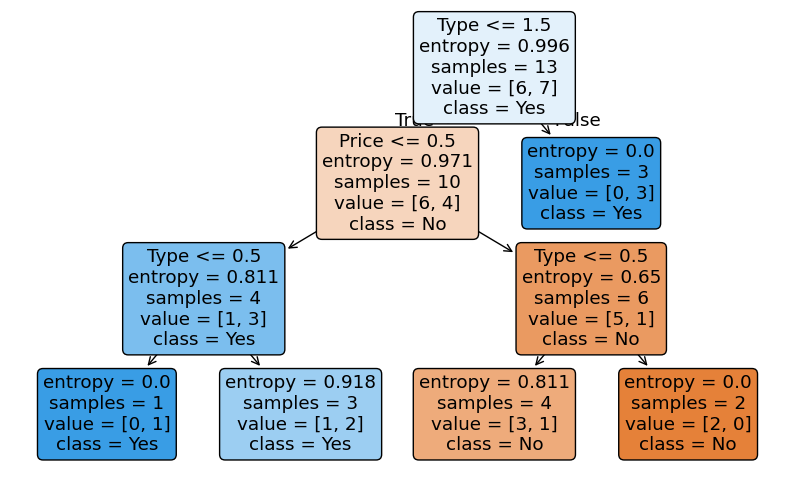

|--- Type <= 1.50
|   |--- Price <= 0.50
|   |   |--- Type <= 0.50
|   |   |   |--- class: 1
|   |   |--- Type >  0.50
|   |   |   |--- class: 1
|   |--- Price >  0.50
|   |   |--- Type <= 0.50
|   |   |   |--- class: 0
|   |   |--- Type >  0.50
|   |   |   |--- class: 0
|--- Type >  1.50
|   |--- class: 1

Model Accuracy: 60.00%


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Training dataset
data = {
    'Type': ['HipHop', 'Rock', 'Rock', 'HipHop', 'Jazz', 'Rock', 'Jazz', 'Jazz', 'HipHop', 'Jazz', 'Rock', 'Jazz', 'Rock'],
    'Price': ['Expensive', 'Cheap', 'Expensive', 'Cheap', 'Cheap', 'Expensive', 'Expensive', 'Cheap', 'Expensive', 'Expensive', 'Expensive', 'Cheap', 'Expensive'],
    'Buy': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Convert categorical variables to numerical values
df['Type'] = df['Type'].map({'Rock': 0, 'Jazz': 1, 'HipHop': 2})
df['Price'] = df['Price'].map({'Cheap': 0, 'Expensive': 1})
df['Buy'] = df['Buy'].map({'No': 0, 'Yes': 1})

# Splitting features and target variable
X = df[['Type', 'Price']]
y = df['Buy']

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

# Visualizing the decision tree
plt.figure(figsize=(10, 6))
plot_tree(dt, feature_names=['Type', 'Price'], class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Print decision rules
print(export_text(dt, feature_names=['Type', 'Price']))

# Test dataset
test_data = {
    'Type': ['Rock', 'Jazz', 'Jazz', 'Rock', 'HipHop'],
    'Price': ['Cheap', 'Cheap', 'Expensive', 'Expensive', 'Expensive'],
    'Buy': ['Yes', 'No', 'No', 'Yes', 'Yes']  # Actual values
}

test_df = pd.DataFrame(test_data)
test_df['Type'] = test_df['Type'].map({'Rock': 0, 'Jazz': 1, 'HipHop': 2})
test_df['Price'] = test_df['Price'].map({'Cheap': 0, 'Expensive': 1})

y_pred = dt.predict(test_df[['Type', 'Price']])
accuracy = (y_pred == test_df['Buy'].map({'No': 0, 'Yes': 1})).mean()

print(f"Model Accuracy: {accuracy * 100:.2f}%")